<h1>TASK 4</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Environment Configuration</a></li>
    <li><a href='#002'>Text Preprocessing</a></li>
    <li><a href='#003'>Finding Top 10 Most Important Words from Each Chapter</a></li>
    <li><a href='#004'>Finding Top 10 Most Used Verbs in Sentences with Alice</a></li>
    </ol>
</ul>

<a name='001'></a>

<h2>Environment Configuration</h2>

Importing environment.

In [1]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

<a name='002'></a>

<h2>Text Preprocessing</h2>

Extracting relevant part of the text from file.

In [2]:
filepath = 'text.txt'
begin = 'CHAPTER XII.   Alice’s Evidence'
end = 'THE END'
delimiter = 'CHAPTER '

with open(filepath, 'r', encoding='utf8') as file:
    text = file.read()

In [3]:
splitted_text = text.split(begin)[1]
splitted_text = splitted_text.split(end)[0]
splitted_text = splitted_text.split(delimiter)[1:]

Splitting text into chapters and visualization.

In [4]:
alice_df = pd.DataFrame()

for index in range(12):
    alice_df.loc[index, 'chapter'] = 'CHAPTER {}'.format(index+1)
    alice_df.loc[index, 'text'] = splitted_text[index]

alice_df

,chapter,text
0,CHAPTER 1,I.\nDown the Rabbit-Hole\n\n\nAlice was beginn...
1,CHAPTER 2,II.\nThe Pool of Tears\n\n\n“Curiouser and cur...
2,CHAPTER 3,III.\nA Caucus-Race and a Long Tale\n\n\nThey ...
3,CHAPTER 4,IV.\nThe Rabbit Sends in a Little Bill\n\n\nIt...
4,CHAPTER 5,V.\nAdvice from a Caterpillar\n\n\nThe Caterpi...
5,CHAPTER 6,VI.\nPig and Pepper\n\n\nFor a minute or two s...
6,CHAPTER 7,VII.\nA Mad Tea-Party\n\n\nThere was a table s...
7,CHAPTER 8,VIII.\nThe Queen’s Croquet-Ground\n\n\nA large...
8,CHAPTER 9,IX.\nThe Mock Turtle’s Story\n\n\n“You can’t t...
9,CHAPTER 10,X.\nThe Lobster Quadrille\n\n\nThe Mock Turtle...


Text preprocessing using removing non-alphabetic characters and stop words, converting to lower case and lemmatization.

In [5]:
def text_preprocessing(text):
    text = re.sub('[^a-zA-Z ]+', ' ', text)
    text = re.sub(' +', ' ', text)
    
    text = text.lower()
    
    tokens = word_tokenize(text)
    
    stoplist = set(stopwords.words('english'))
    words = [token for token in tokens if token not in stoplist and token != 'alice']
    
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmas)

Writing preprocessed text to spreadsheet.

In [6]:
for index in range(len(alice_df)):
    alice_df.loc[index, 'preprocessed_text'] = text_preprocessing(alice_df.loc[index, 'text'])

alice_df

,chapter,text,preprocessed_text
0,CHAPTER 1,I.\nDown the Rabbit-Hole\n\n\nAlice was beginn...,rabbit hole beginning get tired sitting sister...
1,CHAPTER 2,II.\nThe Pool of Tears\n\n\n“Curiouser and cur...,ii pool tear curiouser curiouser cried much su...
2,CHAPTER 3,III.\nA Caucus-Race and a Long Tale\n\n\nThey ...,iii caucus race long tale indeed queer looking...
3,CHAPTER 4,IV.\nThe Rabbit Sends in a Little Bill\n\n\nIt...,iv rabbit sends little bill white rabbit trott...
4,CHAPTER 5,V.\nAdvice from a Caterpillar\n\n\nThe Caterpi...,v advice caterpillar caterpillar looked time s...
5,CHAPTER 6,VI.\nPig and Pepper\n\n\nFor a minute or two s...,vi pig pepper minute two stood looking house w...
6,CHAPTER 7,VII.\nA Mad Tea-Party\n\n\nThere was a table s...,vii mad tea party table set tree front house m...
7,CHAPTER 8,VIII.\nThe Queen’s Croquet-Ground\n\n\nA large...,viii queen croquet ground large rose tree stoo...
8,CHAPTER 9,IX.\nThe Mock Turtle’s Story\n\n\n“You can’t t...,ix mock turtle story think glad see dear old t...
9,CHAPTER 10,X.\nThe Lobster Quadrille\n\n\nThe Mock Turtle...,x lobster quadrille mock turtle sighed deeply ...


<a name='003'></a>

<h2>Finding Top 10 Most Important Words from Each Chapter</h2>

Building function for extracting text features using `TfidfVectorizer`.

Building function to visualize results.

In [7]:
def feature_extraction(text):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(text)
    
    data = vectorizer.transform(text)
    df = pd.DataFrame(data.toarray(), columns=vectorizer.get_feature_names())
    return df

def plot_bar(data, index):
    figure, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    ax = top.plot.bar(rot=0)
    ax.set(xlabel='Word')
    ax.set(ylabel='Value')
    ax.set_title('Chapter {}'.format(index))
    
    plt.show()

Extracting and visualizing text features using `TfidfVectorizer`.

In [8]:
features = feature_extraction(alice_df['preprocessed_text'])
features

,abide,able,absence,absurd,acceptance,accident,accidentally,account,accounting,accusation,...,yelled,yelp,yer,yes,yesterday,yet,young,youth,zealand,zigzag
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.016908,0.000000,0.000000,0.000000,0.000000,0.032687,0.000000
1,0.000000,0.031045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.023552,0.013646,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.026442,0.030789,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.015926,0.000000,0.000000,0.020965,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.025703,0.102811,0.000000,0.000000,0.045193,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.052541,0.016278,0.143434,0.000000,0.023906
5,0.022229,0.000000,0.000000,0.019090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.009771,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015687,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.028345,0.000000,0.024088,0.012438,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018849,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.022706,0.016651,0.009648,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.020322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.031537,0.000000,0.017866,0.027677,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017512,0.000000,...,0.017512,0.000000,0.000000,0.018117,0.013285,0.000000,0.000000,0.000000,0.000000,0.000000


Sorting extracted features to find top 10 most important words.

Visualization of the results.

10 Most Important Words for Chapter 1
1. little
2. bat
3. rabbit
4. door
5. key
6. way
7. eat
8. like
9. think
10. either


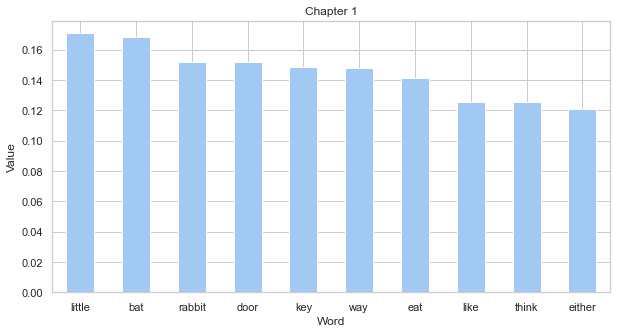

10 Most Important Words for Chapter 2
1. mouse
2. pool
3. little
4. oh
5. swam
6. cat
7. dear
8. said
9. foot
10. mabel


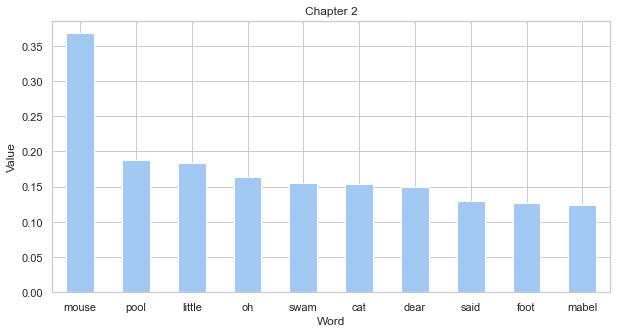

10 Most Important Words for Chapter 3
1. said
2. mouse
3. dodo
4. race
5. prize
6. lory
7. dry
8. thimble
9. know
10. bird


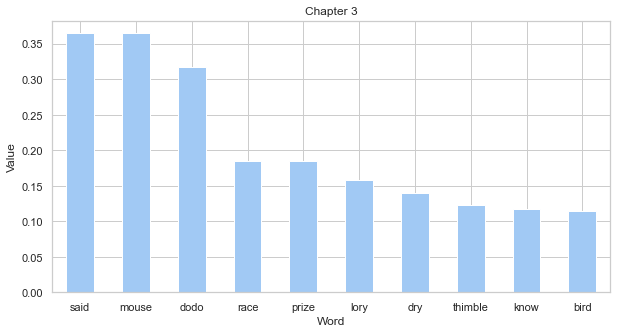

10 Most Important Words for Chapter 4
1. bill
2. rabbit
3. little
4. window
5. puppy
6. glove
7. one
8. chimney
9. bottle
10. fan


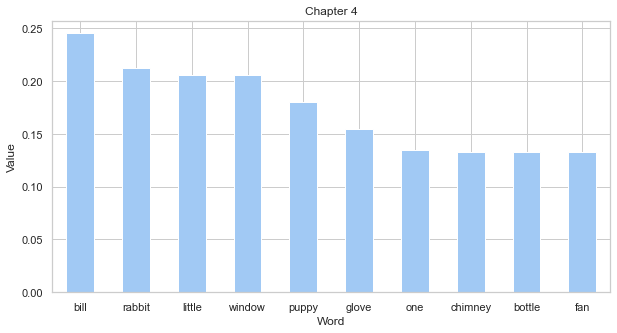

10 Most Important Words for Chapter 5
1. caterpillar
2. said
3. pigeon
4. serpent
5. egg
6. youth
7. size
8. father
9. little
10. well


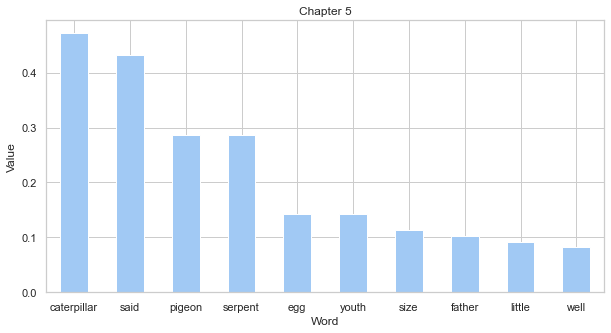

10 Most Important Words for Chapter 6
1. said
2. footman
3. cat
4. baby
5. mad
6. duchess
7. wow
8. like
9. pig
10. cook


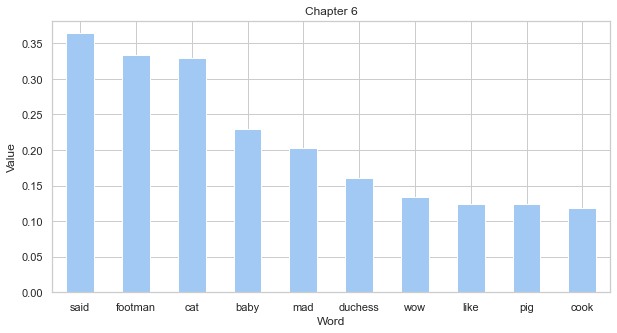

10 Most Important Words for Chapter 7
1. hatter
2. dormouse
3. said
4. march
5. hare
6. tea
7. twinkle
8. time
9. well
10. treacle


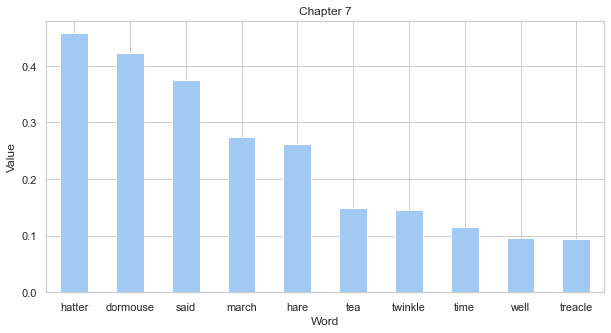

10 Most Important Words for Chapter 8
1. queen
2. said
3. hedgehog
4. king
5. gardener
6. soldier
7. cat
8. rose
9. five
10. executioner


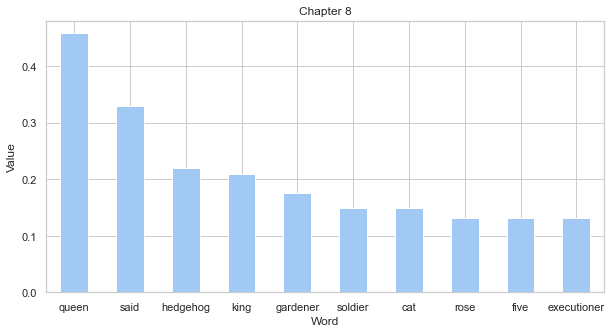

10 Most Important Words for Chapter 9
1. turtle
2. said
3. mock
4. gryphon
5. duchess
6. moral
7. queen
8. went
9. school
10. never


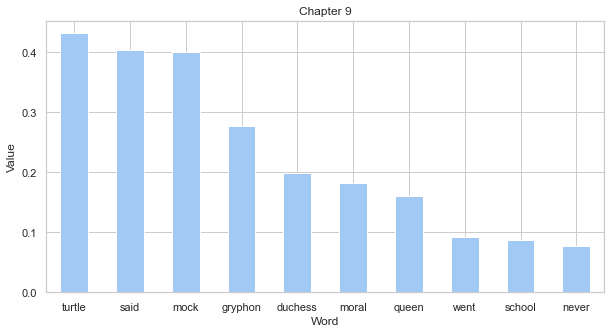

10 Most Important Words for Chapter 10
1. turtle
2. mock
3. gryphon
4. said
5. lobster
6. dance
7. soup
8. join
9. beautiful
10. whiting


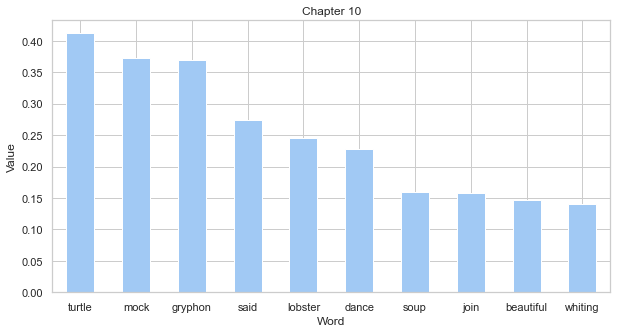

10 Most Important Words for Chapter 11
1. king
2. hatter
3. said
4. court
5. dormouse
6. witness
7. jury
8. queen
9. officer
10. juror


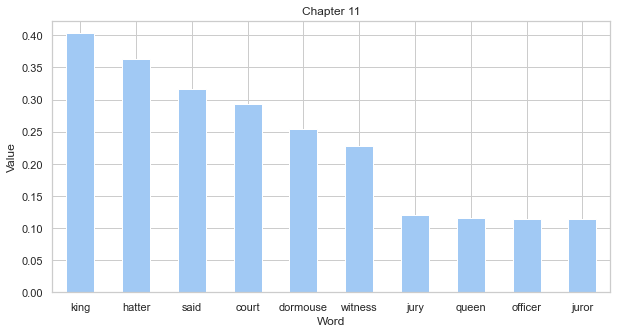

10 Most Important Words for Chapter 12
1. said
2. king
3. jury
4. queen
5. sister
6. important
7. dream
8. slate
9. would
10. rabbit


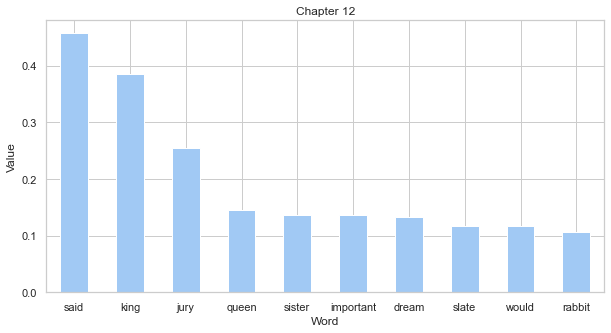

In [10]:
for chapter in range(len(features)):
    top = features.loc[chapter, :].sort_values(ascending=False).head(10)
    
    print('10 Most Important Words for Chapter {}'.format(chapter+1))
    for index, data in enumerate(top.index):
        print('{}. {}'.format(index+1, data))
    plot_bar(top, index=chapter+1)

<a name='004'></a>

<h2>Finding Top 10 Most Used Verbs in Sentences with Alice

Splitting text into sentences.

Extracting sentences with `Alice`.

In [11]:
splitted_text = text.split(begin)[1]
splitted_text = splitted_text.split(end)[0]

sentences = re.split('[.?!]', splitted_text)
alice_sentences = [' '.join(sentence for sentence in sentences if 'Alice' in sentence)]

Text preprocessing using removing non-alphabetic characters and stop words, converting to lower case and verbs lemmatization using tagged words.

In [12]:
def text_preprocessing(text):
    text = re.sub('[^a-zA-Z ]+', ' ', text)
    text = re.sub(' +', ' ', text)
    
    text = text.lower()
    
    tokens = word_tokenize(text)
    
    stoplist = set(stopwords.words('english'))
    words = [token for token in tokens if token not in stoplist]
    
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word) for word in words]
    
    tags = nltk.pos_tag(lemmas)
    verbs = [verb for verb, tag in tags if tag in ['VB', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']]
    
    lemmas = [lemmatizer.lemmatize(verb, 'v') for verb in verbs]
    return lemmas

Counting and visualizing actions that Alice performs most often.

In [13]:
Counter(text_preprocessing(alice_sentences[0])).most_common(10)

[('say', 198),
 ('go', 63),
 ('think', 51),
 ('get', 41),
 ('look', 41),
 ('begin', 31),
 ('see', 25),
 ('come', 24),
 ('know', 21),
 ('find', 20)]